# 1. Descripción del problema
**Entrada**: Una capacidad máxima de la mochila $W$, una lista $V = [k_0,...,k_n]$ de elementos, con cada una de peso $P = [p_0,...,p_n]$, en donde cada objeto $k_i$ pesa $p_i$.

**Salida**: Una lista de objetos donde $\sum\limits_{i=1}^m sp_i <= leq W$ y $∑\limits_{i=1}^m sv_i$ es el valor máximo posible sin superar el peso.

El objetivo es tener un algoritmo que resuelva el problema de seleccionar todos los objetos posibles sin superar un peso límite dado por $W$, pero de forma que se guarden los objetos de mayor valor.

#2. Código

##2.1 Resolución dinámica

In [21]:
import numpy as np
def MochilaDinamico(W, V, P, verbose = False):
    Lista = [] # Lista de índices de objetos que se deberían tomar
    matrix = [[0 for i in range(W+1)] for i in range(len(V))]

    if verbose == True: print("\nMatrix Inicializada en ceros")
    if verbose == True: print(np.matrix(matrix))

    cont = 0

    for n in range(0, len(V)):
        if verbose == True: print("\nPara el objeto n =", n+1)
        for w in range(1, W+1):
            if verbose == True: print("\nComo peso máximo w =", w)
            if verbose == True: print("\nComparando el peso del objeto P[n]", P[n], "con w")
            if P[n] <= w:
                cont += 1
                if verbose == True: print("El peso del objeto es menor")
                if verbose == True: print("Se guarda el máximo entre la solución anterior y la nueva")
                if(V[n] + matrix[n-1][w-P[n]] > matrix[n-1][w]):
                    if verbose == True: print("La nueva es mayor, se asigna a Matrix[n][w] =", V[n] + matrix[n-1][w-P[n]])
                else:
                    if verbose == True: print("La anterior es mayor, se asigna a Matrix[n][w] =", matrix[n-1][w])
                matrix[n][w] = max(V[n] + matrix[n-1][w-P[n]] , matrix[n-1][w])
            else:
                if verbose == True: print("Sobrepasa el peso por lo que se asigna la solución anterior a Matrix[n][w] =", matrix[n-1][w])
                matrix[n][w] = matrix[n-1][w]
            if verbose == True: print(np.matrix(matrix))
    return Lista, matrix[len(V)-1][W], cont

In [8]:
# Ejemplo
W = 6
V = [4, 6, 6, 3]
P = [3, 4, 2, 1]
print("Entrada:")
print("Capacidad:", W)
print("Valor Objetos =", V)
print("Peso Objetos  =", P)
Lista, valor = MochilaDinamico(W, V, P)
print("\nSalida:")
#print("Lista de Objetos", Lista)
print("Valor", valor)
#print("Recursiones:", recursiones)

Entrada:
Capacidad: 6
Valor Objetos = [4, 6, 6, 3]
Peso Objetos  = [3, 4, 2, 1]

Salida:
Valor 13


### 2.1.1 Descripción del algoritmo dinámico
El algoritmo **Mochila (dinámico bottom-up)** genera una matriz y calcula las combinaciones óptimas de objetos que maximicen el valor para cada peso desde 0 hasta W (las columnas) para cada objeto (las filas), guardandolos en la matriz y utiliza los resultados calculados anteriormente para ver si es mejor o peor la nueva solución. De esta manera cuando la matriz se llene, el elemento de la última fila y última columna tendrá el valor máximo.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

### 2.1.2 Ejecución del algoritmo paso a paso

In [27]:
# Ejemplo
W = 6
V = [4, 6, 6, 3]
P = [3, 4, 2, 1]
print("Entrada:")
print("Capacidad:", W)
print("Valor Objetos =", V)
print("Peso Objetos  =", P)
Lista, valor,a = MochilaDinamico(W, V, P, True)
print("\nSalida:")
print("Lista de Objetos", Lista)
print("Valor", valor)
#print("Recursiones:", recursiones)

Entrada:
Capacidad: 6
Valor Objetos = [4, 6, 6, 3]
Peso Objetos  = [3, 4, 2, 1]

Matrix Inicializada en ceros
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Para el objeto n = 1

Como peso máximo w = 1

Comparando el peso del objeto P[n] 3 con w
Sobrepasa el peso por lo que se asigna la solución anterior a Matrix[n][w] = 0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Como peso máximo w = 2

Comparando el peso del objeto P[n] 3 con w
Sobrepasa el peso por lo que se asigna la solución anterior a Matrix[n][w] = 0
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Como peso máximo w = 3

Comparando el peso del objeto P[n] 3 con w
El peso del objeto es menor
Se guarda el máximo entre la solución anterior y la nueva
La nueva es mayor, se asigna a Matrix[n][w] = 4
[[0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Como peso máximo w = 4

Comparando el peso del objeto P[n] 3 con w
El peso del objeto es menor


### 2.1.3 Ejemplo
Supongamos que se tiene una mochila con capacidad de 6kg y los objetos:

- Objeto 1 -> índice 0, Valor 4, Peso 3

- Objeto 2 -> índice 1, Valor 6, Peso 4

- Objeto 3 -> índice 2, Valor 6, Peso 2

- Objeto 4 -> índice 3, Valor 3, Peso 1

Se crea la matriz de $6$ (peso) por $4$ (objetos) inicializada en ceros:

[[0 0 0 0 0 0 0]

 [0 0 0 0 0 0 0]

 [0 0 0 0 0 0 0]

 [0 0 0 0 0 0 0]]

- Para el objeto n = 1:

    - Como peso máximo w = 1:

        - Se compara el peso del objeto P[n] 3 con w:

            - Este sobrepasa el peso por lo que se asigna la solución anterior a Matrix[n][w] = 0

                [[0 0 0 0 0 0 0]

                [0 0 0 0 0 0 0]

                [0 0 0 0 0 0 0]

                [0 0 0 0 0 0 0]]



    - Ahora se continúa con peso máximo w = 2:

        - Comparando el peso del objeto P[n] 3 con w:

            - Sobrepasa el peso por lo que se asigna la solución anterior a Matrix[n][w] = 0

                [[0 0 0 0 0 0 0]

                 [0 0 0 0 0 0 0]

                 [0 0 0 0 0 0 0]

                 [0 0 0 0 0 0 0]]



    - Como peso máximo w = 3

        - Comparando el peso del objeto P[n] 3 con w

            - El peso del objeto es menor

                - Se guarda el máximo entre la solución anterior y la nueva

                    - La nueva es mayor, se asigna a Matrix[n][w] = 4

                        [[0 0 0 4 0 0 0]

                         [0 0 0 0 0 0 0]

                         [0 0 0 0 0 0 0]

                         [0 0 0 0 0 0 0]]



    - Como peso máximo w = 4

        - Comparando el peso del objeto P[n] 3 con w

            - El peso del objeto es menor

                - Se guarda el máximo entre la solución anterior y la nueva

                    - La nueva es mayor, se asigna a Matrix[n][w] = 4

                        [[0 0 0 4 4 0 0]

                         [0 0 0 0 0 0 0]

                         [0 0 0 0 0 0 0]

                         [0 0 0 0 0 0 0]]



    - Se realiza lo mismo para los pesos 5 y 6, quedando la matriz:

        [[0 0 0 4 4 4 4]

         [0 0 0 0 0 0 0]

         [0 0 0 0 0 0 0]

         [0 0 0 0 0 0 0]]



- Ahora se ve al objeto 2:

    - Se comienza nuevamente con peso máximo w = 1:

        - Se compara el peso del objeto P[n] 4 con w:

            - Sobrepasa el peso por lo que se asigna la solución anterior a Matrix[n][w] = 0

                [[0 0 0 4 4 4 4]

                 [0 0 0 0 0 0 0]

                 [0 0 0 0 0 0 0]

                 [0 0 0 0 0 0 0]]


    - Al igual que con el primer objeto, se realiza el procedimiento para los pesos restantes, quedando la matriz:

        [[0 0 0 4 4 4 4]

         [0 0 0 4 6 6 6]

         [0 0 0 0 0 0 0]

         [0 0 0 0 0 0 0]]



- Este paso se repite para el objeto n = 3, quedando la matriz:

    [[ 0  0  0  4  4  4  4]

     [ 0  0  0  4  6  6  6]

     [ 0  0  6  6  6 10 12]

     [ 0  0  0  0  0  0  0]]

- Y se repite para el último objeto:

    [[ 0  0  0  4  4  4  4]

     [ 0  0  0  4  6  6  6]

     [ 0  0  6  6  6 10 12]

     [ 0  3  6  9  9 10 13]]

Finalmente se retorna el valor del elemento de abajo a la derecha de la matriz, el cual es $13$. Este corresponde al valor máximo posible que se puede guardar en la mochila.

Salida:

Lista de Objetos []

Valor 13

### 2.1.4 Correctitud

El algoritmo **Mochila (dinámico bottom-up)** devuelve la lista de objetos cuya suma de pesos es menor a $W$ y la suma de valores es mayor o igual a cualquier otra posibilidad.

### Prueba del Teorema

Encontrar el valor máximo para una capacidad $W$ es equivalente a encontrar la solución para un peso mayor y solucionar para el peso restante.

#### Bucle Invariante

##### Inicialización

Para $n = 0$ o $w = 0$, todos los valores son $0$ ya que no se tiene valor si no hay elementos o la capacidad es 0$.

##### Mantención

Para un elemento $(i,j)$ = (peso i, objeto j) de la matriz, el elemento $(i - P[j], j-1)$ tiene la solución (calculada previamente) para el peso restante $(i - P[j])$ y $(i, j-1)$ tiene el valor máximo para el mismo peso pero con el objeto anterior.

##### Finalización

Finalmente, como la propiedad de bucle invariante es verdadera al incio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la j-ésima iteración de la i-ésima iteración del algoritmo, se que genera una matriz M:

$[a_{1,1}',a_{2,1}',...,a_{i,1}']$

$[a_{1,2}',a_{2,2}',...,a_{i,2}']$

$[..., ..., ..., ...']$

$[a_{1,j}',a_{2,j}',...,a_{i,j}']$

donde $a_{i,j}'$ tiene el valor máximo de la mochila.

### 2.1.5 Tiempo de ejecución
El algoritmo **Mochila (dinámico bottom-up)** tiene un tiempo de ejecución de $O(n*w)$ donde $n$ es la cantidad de objetos y $w$ es la capacidad de la mochila.

#### 2.1.5.1 Fórmula de recurrencia

La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

- Un ciclo for que itera $n$ veces, por ello tiene un tiempo de ejecución de $O(n)$.

- Otro ciclo for que itera $w$ (capacidad de la mochila) veces donde:

    - Se guarda un valor máximo entre dos variables, lo cual tiene un tiempo de ejecución de $O(1)$.

Juntando las partes se tiene que:

$T(n) = n * w$

Por lo cual la complejidad temporal del algoritmo es $O(n*w)$.

##2.2 Resolución greedy

In [23]:
def MochilaGreedy(W, V, P, verbose = False):
    Ratios = [(V[i]/P[i]) for i in range(len(V))]
    indexes = [i for i in range(0, len(V))]

    if verbose == True: print("Indices", indexes)
    if verbose == True: print("Ratios", Ratios)

    if verbose == True: print("Ordenando objetos desde Mayor V/P hasta Menor V/P.")
    for i in range(1, len(V)):
        c = i
        while Ratios[c] > Ratios[c-1] and c > 0:
            Ratios[c], Ratios[c-1] = Ratios[c-1], Ratios[c]
            V[c], V[c-1] = V[c-1], V[c]
            P[c], P[c-1] = P[c-1], P[c]
            indexes[c], indexes[c-1] = indexes[c-1], indexes[c]
            c-=1

    if verbose == True: print("\nObjetos ordenados:")
    if verbose == True: print("Índices:", indexes)
    if verbose == True: print("Valores:", V)
    if verbose == True: print("Pesos:", P)
    if verbose == True: print("Ratios:", Ratios)

    max = 0
    if verbose == True: print("\nMax empieza en 0.")
    j = cont = 0
    for i in indexes:
        cont += 1
        if verbose == True: print("")
        if verbose == True: print(i+1,"th objeto de indice", i,".")
        if verbose == True: print("Se compara si P[i]", P[i], "es menor o igual a W", W,".")
        if (P[i] <= W):
            if verbose == True: print("Es menor por lo que se suma el Valor del objeto", V[i], "a Max.")
            max += V[i]
            if verbose == True: print("Max actual =", max)
            W -= P[i]
            if verbose == True: print("Capacidad restante se le resta el Peso del objeto, quedando en", W,".")
            j+=1
        else:
            if verbose == True: print("Se supera el peso límite, no se agrega.")
    if verbose == True: print("Se retorna la lista de objetos guardados y el valor de la suma de ellos.")
    return indexes[0:j], max, cont

### 2.2.1 Descripción del algoritmo greedy
El algoritmo en forma greedy saca la relación entre el Valor y el Peso del objeto (Valor/Peso) y luego ordena los objetos de mayor a menor con respecto a esa relación, luego los agrega uno a uno en la mochila hasta que se alcance el límite se peso, sin pasarse de este. Luego retorna el la suma del valor de los objetos agregados.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

### 2.2.2 Ejemplo
Supongamos que se tiene una mochila con capacidad de 6kg y los objetos:

- Objeto 1 -> índice 0, Valor 4, Peso 3

- Objeto 2 -> índice 1, Valor 6, Peso 4

- Objeto 3 -> índice 2, Valor 6, Peso 2

- Objeto 4 -> índice 3, Valor 3, Peso 1

El algoritmo obtiene el Ratio de Valor/Peso de cada objeto:

- Ratios [1.3333333333333333, 1.5, 3.0, 3.0]

Luego ordena los objetos desde el mayor al menor ratio con una variación de **InsertSort**:

Objetos ordenados:

- Índices: [2, 3, 1, 0]

- Valores: [6, 3, 6, 4]

- Pesos: [2, 1, 4, 3]

- Ratios: [3.0, 3.0, 1.5, 1.3333333333333333]

El valor Max empieza en 0.

Se entra en el ciclo While donde se recorre la lista de objetos ordenados:

- **Primero se obtiene el 3er objeto (de indice 2).**

    - Se compara si P[i] (4) es menor o igual a W (6).

    - Es menor por lo que se agrega (suma el Valor del objeto (6) a Max).

    - Max actual = 6.

    - Capacidad restante se le resta el Peso del objeto, quedando en 2 .

- **4to objeto (de indice 3).**

    - Se compara si P[i] (3) es menor o igual a W (2).

    - Se supera el límite de peso por lo que no se agrega.

- **2do objeto de indice 1.**

    - Se compara si P[i] (1) es menor o igual a W (2).

    - Es menor por lo que se agrega (suma el Valor del objeto (3) a Max).

    - Max actual = 9

    - Capacidad restante se le resta el Peso del objeto, quedando en 1 .

- **1er objeto (de indice 0).**

    - Se compara si P[i] (2) es menor o igual a W (1).

    - Se supera el límite de peso por lo que no se agrega.

Se retorna la lista de objetos guardados y el valor de la suma de ellos.

Salida:

- Lista de Objetos [2, 3]

- Valor maximo 9

### 2.2.3 Correctitud

El algoritmo **Mochila (greedy)** devuelve la lista de objetos cuya suma de pesos es menor a $W$ y la suma de valores es mayor o igual a cualquier otra posibilidad.

## 2.2.3.1 Prueba del Teorema

Hay que ser greedy y por ello se debe escojer la mejor solución actual en base a un criterio, en este caso es la relación entre el $Valor$ del objeto y su $Peso$. Por esto ordena los objetos desde el que tiene mejor $Valor/Peso$ hasta el menor.

Luego el algoritmo guarda uno a uno los objetos que tienen un peso menor al peso restante.

Finalmente retorna la suma de los elementos guardados.

Sin embargo este valor no es siempre el óptimo, ya que hay ciertas combinaciones de objetos que tienen menor $Valor/Peso$ pero que juntos tienen un mayor valor total sin superar el peso.

Esto se puede ver en el ejemplo de los objetos:

Objeto 1 -> índice 0, Valor 4, Peso 3

Objeto 2 -> índice 1, Valor 6, Peso 4

Objeto 3 -> índice 2, Valor 6, Peso 2

Objeto 4 -> índice 3, Valor 3, Peso 1

con una mochila de capacidad 6. El algoritmo retorna el valor $9$ ya que guarda el tercer y el cuarto elemento por tener el mejor $Valor/Peso$, sin embargo se queda sin espacio para el resto. Con la versión dinámica del algoritmo o simplemente viendo todas las posibles combinaciones se puede ver que hay otra solución con un valor total igual a $13$ la cual es mayor a $9$. Por ello se puede comprobar que este algoritmo no es correcto siempre.

### 2.2.4 Tiempo de ejecución
El algoritmo **Greedy**  tiene un tiempo de ejecución de $O(n+n^2)$ donde $n$ es la cantidad de objetos y $w$ es la capacidad de la mochila.

### 4.2.1. Fórmula de recurrencia

La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

- Utiliza **InsertionSort** el cual tiene un tiempo de ejecución de $O(n^2)$.

- Un ciclo for que itera $n$ veces, por ello tiene un tiempo de ejecución de $O(n)$, donde:

    - Se guarda añade (si es posible) el objeto a la mochila ($O(1)$).

- En el mejor caso no realiza esta iteración, por lo que juntando las partes se tiene que:

Peor caso: $T(n) = n^2 + n$

Mejor caso: $T(n) = n^2$

Por lo cual la complejidad temporal del algoritmo en el peor caso es $O(n+n^2)$ y en el mejor caso es $O(n)$.

#3. Experimentos

In [1]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

## 3.1 Comparación de los tiempos de ejecución dependiendo de los tamaños de entrada

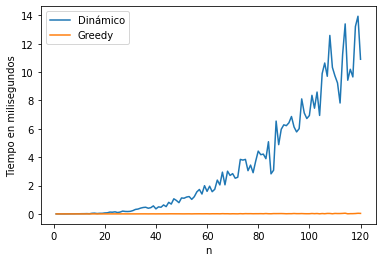

In [19]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[];
yR=[];
yD=[];

for n in range(1,121):
    W, val, wt = knapsack_instance_generator(n)
    x.append(n)
    t = repeat(setup="from __main__ import MochilaDinamico", stmt=f"MochilaDinamico({W}, {val}, {wt})", repeat=1, number=10)
    yR.append(t)
    t = repeat(setup="from __main__ import MochilaGreedy", stmt=f"MochilaGreedy({W}, {val}, {wt})", repeat=1, number=10)
    yD.append(t)

plt.plot(x,yR)
plt.plot(x,yD)
plt.legend(["Dinámico", "Greedy"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que la implementación greedy del algoritmo **Mochila** es mucho más rápida en comparacion a la implementación dinámica, y esto va creciento exponencialmente mientras la cantidad de objetos y la capacidad de la mochila aumentan, sin embargo como se vio anteriormente, la versión greedy no es correcta por lo que esta ventaja de velocidad no es útil al final.

## 3.2 La cantidad de subproblemas que realizan los algoritmos en función del tamaño de entrada

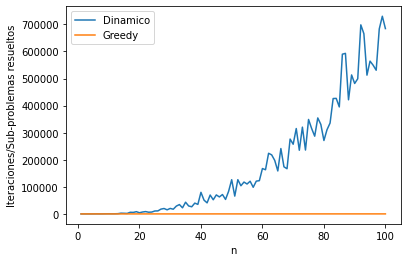

In [25]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x=[];
yD=[];
yG=[];

for n in range(1,101):
    W, val, wt = knapsack_instance_generator(n)
    x.append(n)

    List, value, cont = MochilaDinamico(W, val, wt)
    yD.append(cont)
    List, value, cont = MochilaGreedy(W, val, wt)
    yG.append(cont)

plt.plot(x,yD)
plt.plot(x,yG)
plt.legend(["Dinamico", "Greedy"])

plt.xlabel('n')
plt.ylabel('Iteraciones/Sub-problemas resueltos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que la implementación greedy del algoritmo **Mochila** resuelve una increible cantidad menos de problemas en comparacion a la implementación dinámica, y esto va creciento exponencialmente mientras la cantidad de objetos y la capacidad de la mochila aumentan, sin embargo como se vio anteriormente, la versión greedy no es correcta por lo que esta ventaja de velocidad no es útil al final.

## 3.3 El valor de los items alcanzado por ambos algoritmos

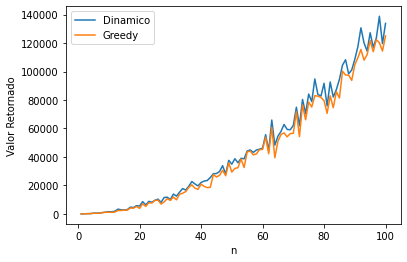

In [24]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x=[];
yD=[];
yG=[];

for n in range(1,101):
    W, val, wt = knapsack_instance_generator(n)
    x.append(n)

    List, value, cont = MochilaDinamico(W, val, wt)
    yD.append(value)
    List, value, cont = MochilaGreedy(W, val, wt)
    yG.append(value)

plt.plot(x,yD)
plt.plot(x,yG)
plt.legend(["Dinamico", "Greedy"])

plt.xlabel('n')
plt.ylabel('Valor Retornado')
plt.show()

### Analisis del gráfico

Del gráfico se puede ver que la versión Greedy nunca supera a la versión Dinámica, esto demuestra que el análisis de la correctitud es cierto. Cabe notar que la diferencia (relativa) no es muy grande.